**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Files

In [ ]:
data = pd.read_csv('/content/sample_data/data_YesBank_StockPrices.csv')

In [ ]:
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


**EDA**

In [ ]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
data.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
# Knowing the data type in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# Finding the null values
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
# For statistical summary
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

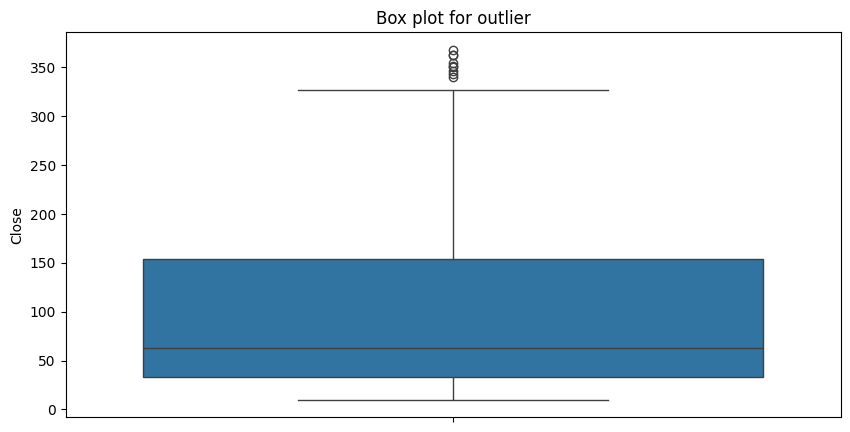

In [ ]:
# Checking for outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=data['Close'])
plt.title('Box plot for outlier')
plt.show()

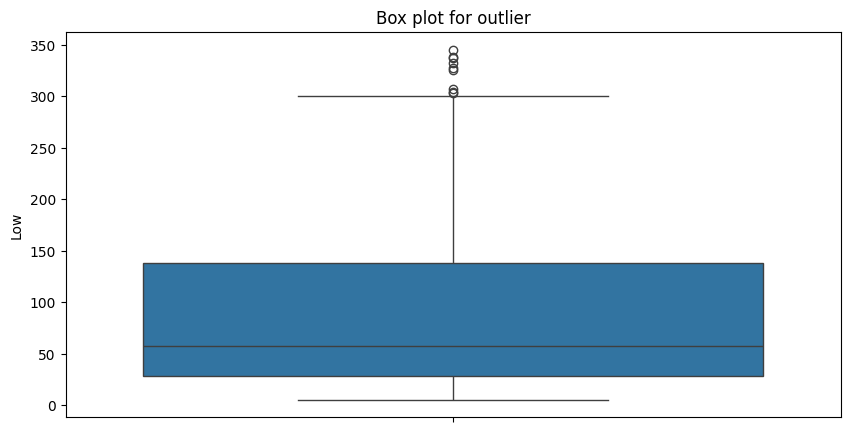

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data['Low'])
plt.title('Box plot for outlier')
plt.show()

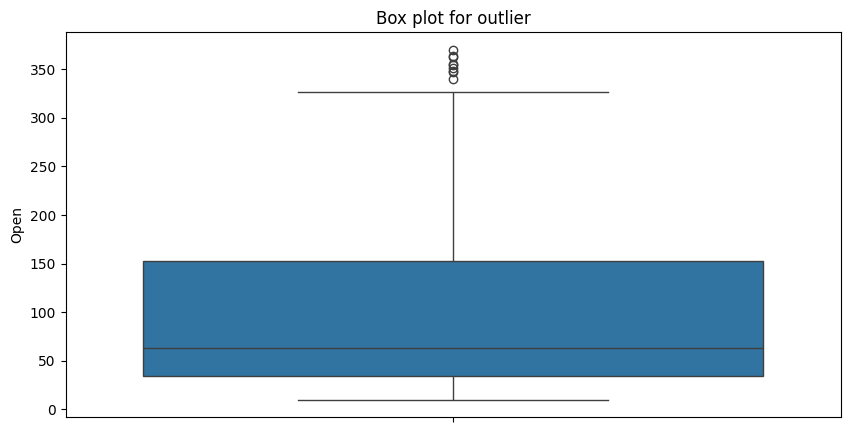

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data['Open'])
plt.title('Box plot for outlier')
plt.show()

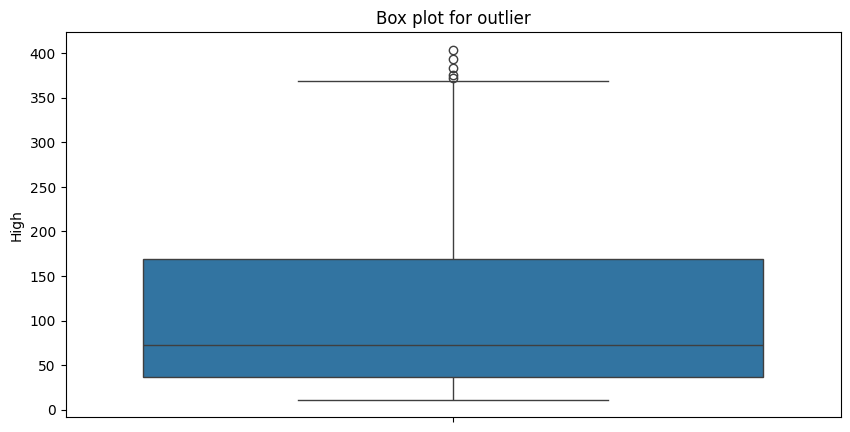

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data['High'])
plt.title('Box plot for outlier')
plt.show()

In [ ]:
print(data.dtypes)

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object


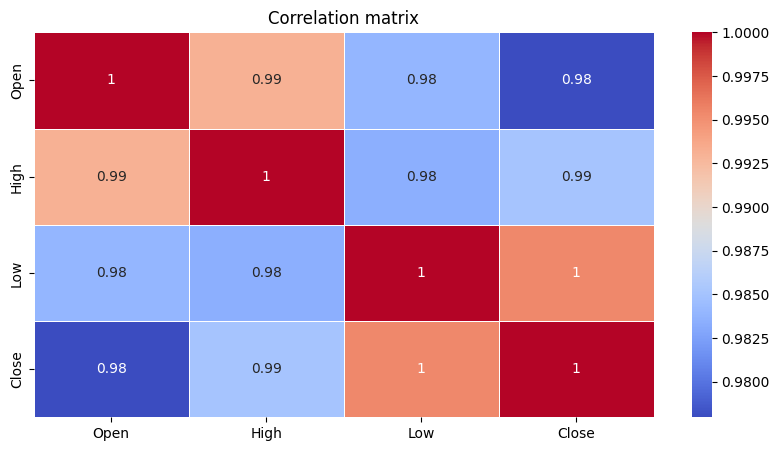

In [ ]:
#Plotting heatmap for correlation
plt.figure(figsize=(10, 5))
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

Interpretation:

A correlation coefficient close to 1 indicates a strong positive linear relationship.

A correlation coefficient close to -1 indicates a strong negative linear relationship.

A correlation coefficient near 0 suggests little to no linear relationship.

Therefore the correlation matrix suggest strong correlation between the variables.

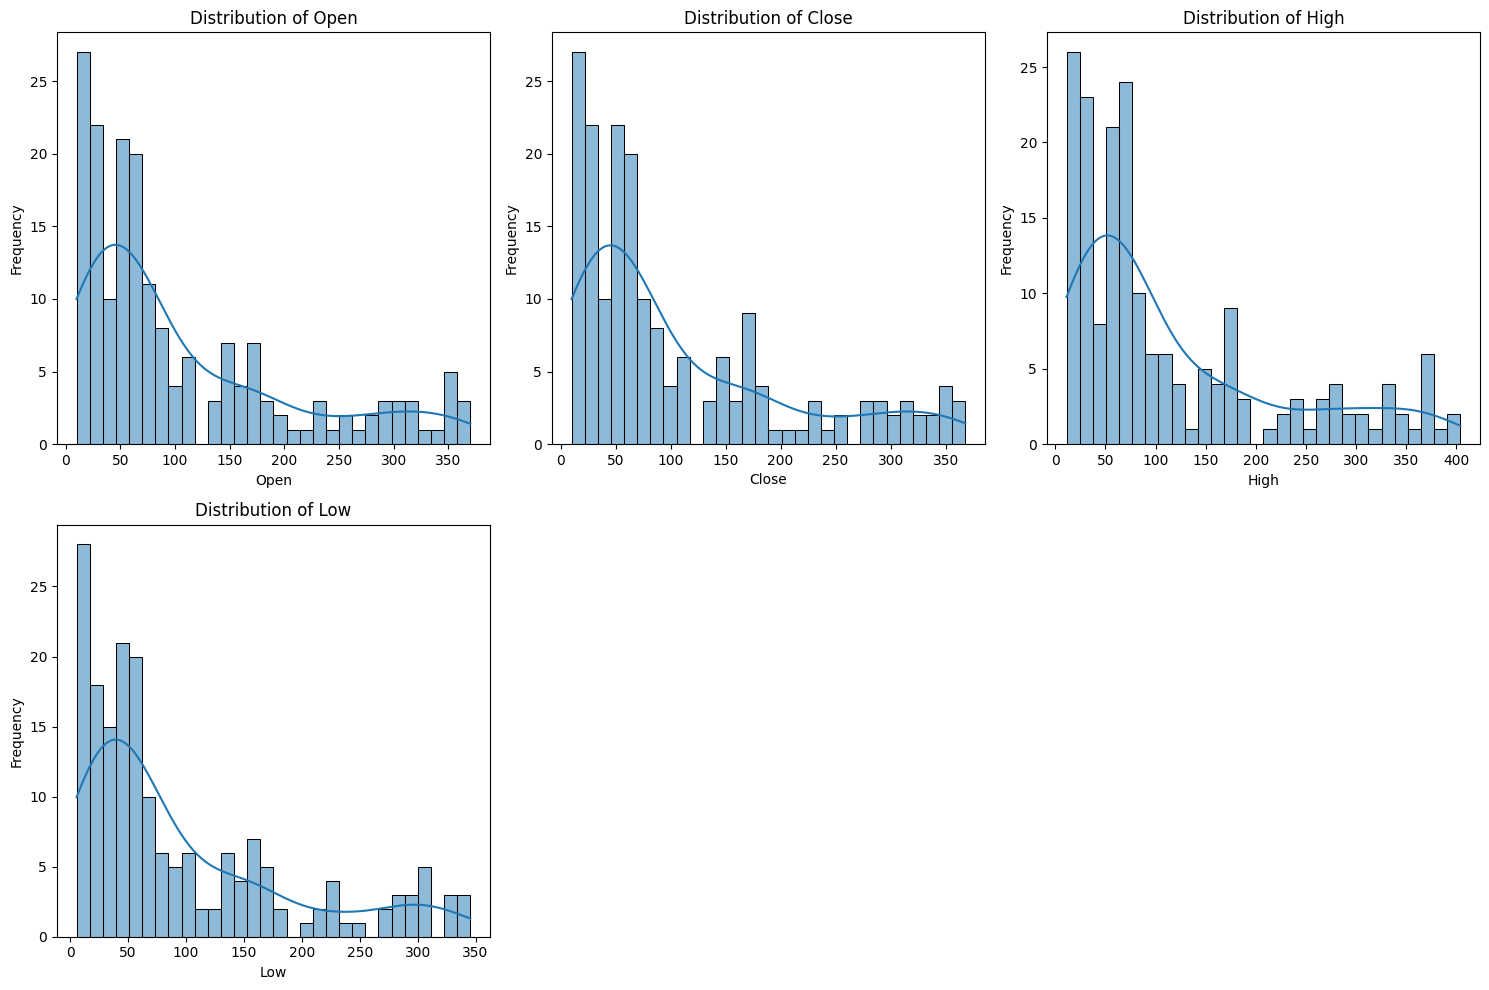

In [ ]:
# Select relevant columns for the histogram
columns_to_plot = ['Open', 'Close', 'High', 'Low',]

# Set up the subplots
num_features = len(columns_to_plot)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the selected columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], bins=30, kde=True, ax=axes[i])  # kde=True adds a kernel density estimate
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#converting date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y')

In [ ]:
data['Date']

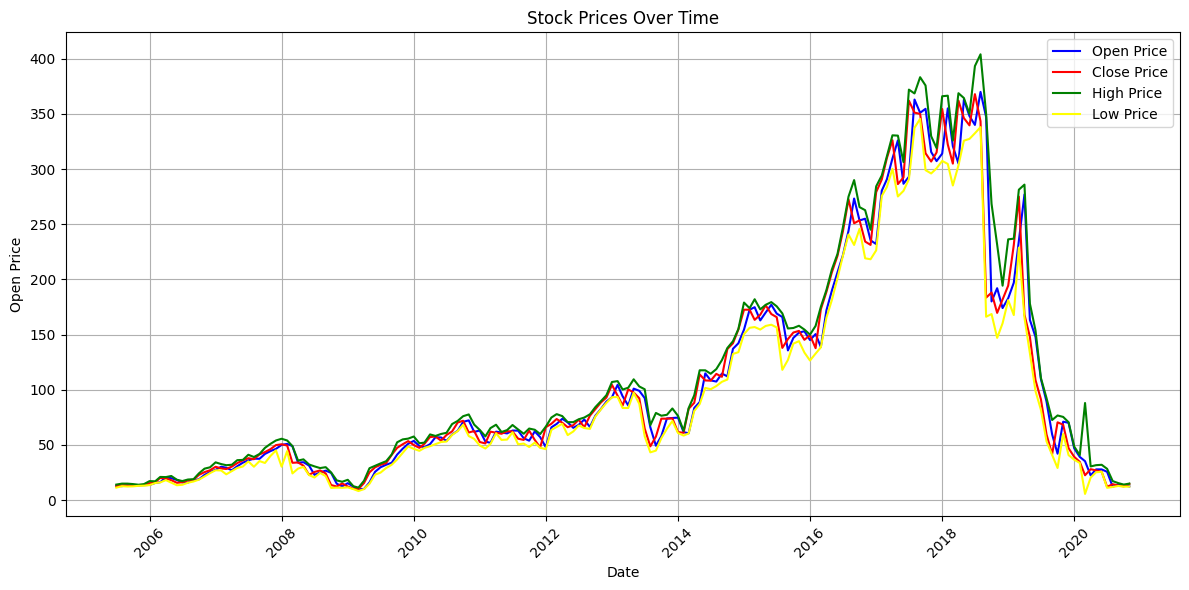

In [ ]:
#Plotting line plot for the distribution for Open price
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Open'], label='Open Price', color='blue')
plt.plot(data['Date'], data['Close'], label='Close Price', color='Red')
plt.plot(data['Date'], data['High'], label='High Price', color='Green')
plt.plot(data['Date'], data['Low'], label='Low Price', color='Yellow')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

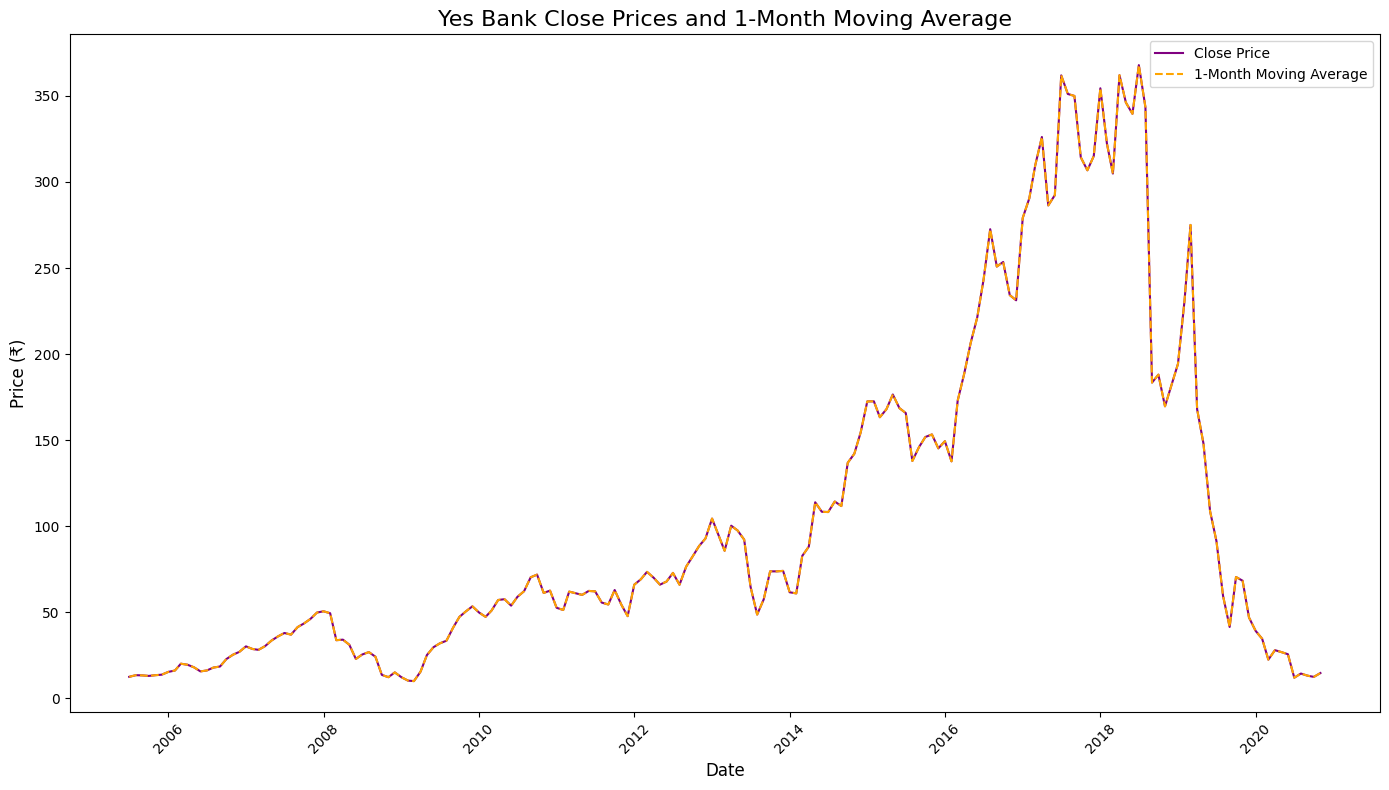

,Date,Close,1_Month_MA,Pct_Change_Close
0,2005-07-01,12.46,12.46,NaN
1,2005-08-01,13.42,13.42,7.704655
2,2005-09-01,13.30,13.30,-0.894188
3,2005-10-01,12.99,12.99,-2.330827
4,2005-11-01,13.41,13.41,3.233256


In [ ]:
# Recalculate the 1-month moving average and percentage change after error
data['1_Month_MA'] = data['Close'].rolling(window=1).mean()
data['Pct_Change_Close'] = data['Close'].pct_change() * 100

# Plot the closing prices and 1-month moving average
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Close'], label='Close Price', color='purple')
plt.plot(data['Date'], data['1_Month_MA'], label='1-Month Moving Average', color='orange', linestyle='--')

# Set labels and title
plt.title('Yes Bank Close Prices and 1-Month Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Display the first few rows of data including moving average and percentage change
data[['Date', 'Close', '1_Month_MA', 'Pct_Change_Close']].head()


**Linear Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Preparing the features and target
X = data[['Open', 'High', 'Low']]  # Features: Open, High, Low
y = data['Close']  # Target: Close

In [ ]:
# Spliting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict the Close prices for the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 86.64379126513735


In [ ]:
# Displaying first few predictions vs actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

            Actual   Predicted
Date                          
2007-02-01   28.63   30.182522
2009-01-01   12.24   14.692830
2018-07-01  367.90  374.021906
2014-10-01  136.83  127.961306
2017-11-01  306.80  315.709468


In summary, the linear regression model provides a solid foundation for predicting Yes Bank's closing stock prices, but further refinement and exploration of advanced modeling techniques are recommended to enhance predictive accuracy and understand the factors influencing stock price dynamics.

**Decision Tree Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = data[['Open', 'High', 'Low']]  # Features: Open, High, Low
y = data['Close']  # Target: Close

In [ ]:
# Spliting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

In [ ]:
# Training the model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predicting the Close prices for the test set
y_pred = dt_model.predict(X_test)

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 257.1497081081081
R² Score: 0.9715505640645158


In [ ]:
# Displaying first few predictions vs actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

            Actual  Predicted
Date                         
2007-02-01   28.63      34.06
2009-01-01   12.24      12.26
2018-07-01  367.90     351.15
2014-10-01  136.83     111.70
2017-11-01  306.80     314.35


The Decision Tree model was utilized to predict Yes Bank's closing stock prices using historical Open, High, and Low prices as features. After training the model on 80% of the data, its performance was evaluated with Mean Squared Error (MSE) and R² score, revealing its predictive accuracy. Overall, the Decision Tree effectively captured non-linear relationships, and future improvements could involve hyperparameter tuning and exploring ensemble methods for enhanced performance.